# 차원의 저주(The curse of dimensionality)

- 딥러닝의 시대가 열리고 층을 깊게 쌓을수록 차원이 커져 비선형성이 더 커지고 더 복잡한 feature를 이용한 성능 향상이 있을것이라 생각했지만 예상과는 다르게 차원이 일정 수준 이상 커지게 되면 학습데이터 수가 차원의 수보다 적어 성능이 저하되는 현상이 일어났다.

- 20%의 공간을 채우기 위한 전체 집단에서의 데이터의 비율은?
- 차원이 증가할 수록 개별 차원 내 학습할 데이터 수가 적어지는 현상을 sparse(희소) 현상이라고 한다.

![](https://images.deepai.org/glossary-terms/curse-of-dimensionality-61461.jpg)
- https://images.deepai.org/glossary-terms/curse-of-dimensionality-61461.jpg


- 따라서 학습이 제대로 이루어지지 않습니다.
- 해결법? 차원을 줄이거나 데이터를 많이 획득해야 합니다.
- 차원이 커질수록 연산량이 기하급수적으로 증가하기 때문에 효율의 측면에서도 차원의 저주는 경계해야 합니다.

- 차원을 축소하기 위한 대표적인 방법으로는 중요한 순위를 정해서 더 중요한 특성만을 추려내거나(**특성 선택, feature selection**), 새로운 특성 공간으로 데이터를 변환하거나 투영하는 방법이 있습니다(**특성 추출, feature extraction**). 


# 주성분 분석(Principal Component Analysis, PCA)
- 가장 널리 사용되는 차원 축소 기법 중 하나로, 원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환

![](https://t1.daumcdn.net/cfile/tistory/99CB343359F2DA5E07)
https://t1.daumcdn.net/cfile/tistory/99CB343359F2DA5E07

<img src="https://git.io/JtsvW" width=400>
머신러닝 교과서, 191쪽

- 여러 변수간에 존재하는 상관 관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 차원 축소시 기존 데이터의 정보 유실이 최소화
- PCA를 선형대수 관점에서 해석시, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해후 
구해진 고유벡터에 입력 데이터를 선형 변환하는 것 의미, 이  고유 벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄

- PCA의 내부적 순서

    1) 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 

    2) 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.

    3) 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.

    4) 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

- 고유값과 고유벡터 추천 참고 자료: https://angeloyeo.github.io/2019/07/17/eigen_vector.html
- PCA 추천 참고 자료: https://angeloyeo.github.io/2019/07/27/PCA.html



<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# 사이킷런 내장 데이터 셋 API 호출
from sklearn.datasets import load_iris
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
iris = load_iris()
iris.keys()

irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**1. 4차원의 붓꽃 데이터를 2차원으로 압축**

4개의 속성을 2개의 PCA 차원으로 압축

In [5]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 원래 4개 축인데 
pca.fit(irisDF)  # 비지도학습이기 때문에 X값들만 줍니다 fit(X, y)
iris_pca = pca.transform(irisDF)

In [7]:
dir(pca)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_feature_names_out',
 'get_params',
 'get_preci

In [6]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [8]:
print(f'n_component{pca.n_components_}') # 2  2개로 줄였어 
print(f'n_features_{pca.n_features_}') # 4  4개의 차원을
print(f'n_features_{pca.n_features_in_}') # 4  
print(f'feature_nam{pca.feature_names_in_}') # ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)' 'petal width (cm)']
print(f'n_samples_){pca.n_samples_}') # 150 150개 데이터가 들어있었어 
print(f'explained_v{pca.explained_variance_}') # [4.22824171 0.24267075]  # 1번째축의 분산, 2번째축의 분산
print(f'explained_v{pca.explained_variance_ratio_}') # [0.92461872 0.05306648] # 92.4%, 5.3%를 캡처했음 -> 97.7% 정도 데이터 보존 1.3% 정도 데이터 손실
print(f'components_{pca.components_}') # [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
print(f'noise_varia{pca.noise_variance_}') # 0.05 
print(f'singular_va{pca.singular_values_}') # [25.09996044  6.01314738]

n_component2
n_features_4
n_features_4
feature_nam['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
n_samples_)150
explained_v[4.22824171 0.24267075]
explained_v[0.92461872 0.05306648]
components_[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
noise_varia0.05102229650818443
singular_va[25.09996044  6.01314738]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
92.4  + 5

97.4

In [10]:
len(iris_pca)

150

In [12]:
irisDF.values.shape

(150, 4)

In [11]:
iris_pca.shape

(150, 2)

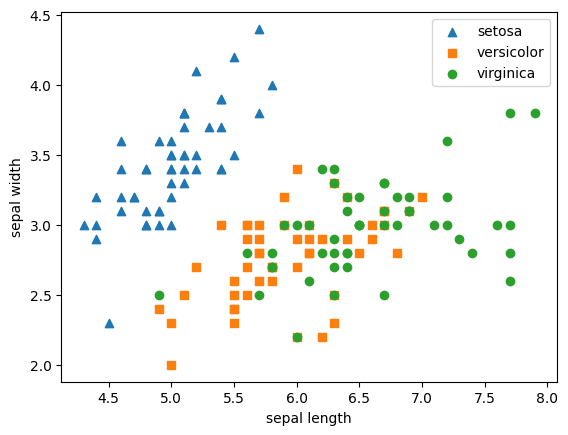

In [14]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# 2차원으로 시각화, 품종 데이터 분포

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
# 반복문을 수행해서 각 target별 matplotlib로 시각화
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


<hr>

**2. PCA 적용전 개별 속성 스케일링**


- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
- **여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요**
- 평균이 0, 분산이 1인 표준 정규 분포로 모든 속성값 변환

https://nicola-ml.tistory.com/4?category=806493 <br>

https://nicola-ml.tistory.com/3

In [23]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 데이터 전처리
scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.transform(iris.data)
iris_scaled

pca = PCA(n_components=2) # 원래 4개 축인데 
pca.fit(iris_scaled)  # 비지도학습이기 때문에 X값들만 줍니다 fit(X, y)
iris_scaled_pca = pca.transform(iris_scaled)
iris_scaled_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [24]:
print(f'n_component{pca.n_components_}') # 2  2개로 줄였어 
print(f'n_features_{pca.n_features_}') # 4  4개의 차원을
print(f'n_features_{pca.n_features_in_}') # 4  
print(f'n_samples_){pca.n_samples_}') # 150 150개 데이터가 들어있었어 
print(f'explained_v{pca.explained_variance_}') # [4.22824171 0.24267075]  # 1번째축의 분산, 2번째축의 분산
print(f'explained_v{pca.explained_variance_ratio_}') # [0.92461872 0.05306648] # 92.4%, 5.3%를 캡처했음 -> 97.7% 정도 데이터 보존 1.3% 정도 데이터 손실
print(f'components_{pca.components_}') # [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
print(f'noise_varia{pca.noise_variance_}') # 0.05 
print(f'singular_va{pca.singular_values_}') # [25.09996044  6.01314738]

n_component2
n_features_4
n_features_4
n_samples_)150
explained_v[2.93808505 0.9201649 ]
explained_v[0.72962445 0.22850762]
components_[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
noise_varia0.08429784161070514
singular_va[20.92306556 11.7091661 ]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
72.96 + 22.85

95.81

**2개의 속성으로 PCA 변환된 데이터 셋트를 2차원상에서 시각화**

모델링하는 개발자가 직접 차원축소를 한 경우 실행결과와 PCA API로 수행한 결과의 분포 확인

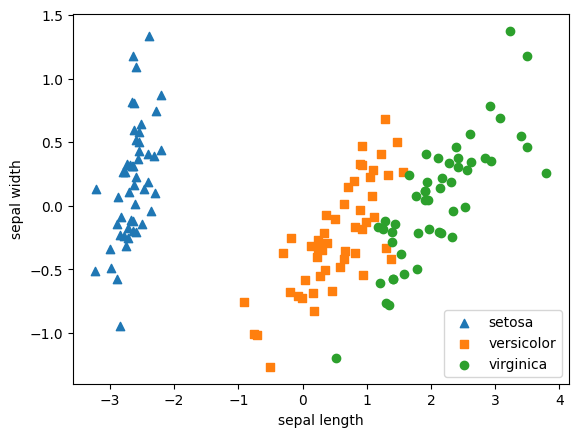

In [ ]:
#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
# 반복문을 수행해서 각 target별 matplotlib로 시각화
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df['label']==i]['comp1']
    y_axis_data = iris_pca_df[iris_pca_df['label']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()


<hr>

**원본 데이터와 PCA로 2차원 데이터로 변환된 데이터 셋으로 모델링 하기**

- Estimator로 RandomForestClassifierRandomForestClassifier 사용
- 참고 : PCA 변환된 데이터 세트가 원본 데이터 세트보다 더 나은 예측 정확도 나타내는 경우는 흔하진 않음. 그러나 차원 축소로 인한 효과로 이를 상쇄

In [25]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
irisDF.iloc[:, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[0.72962445 0.22850762]
   std_comp1  std_comp2  label
0  -2.264703   0.480027      0
1  -2.080961  -0.674134      0
2  -2.364229  -0.341908      0
3  -2.299384  -0.597395      0
4  -2.389842   0.646835      0


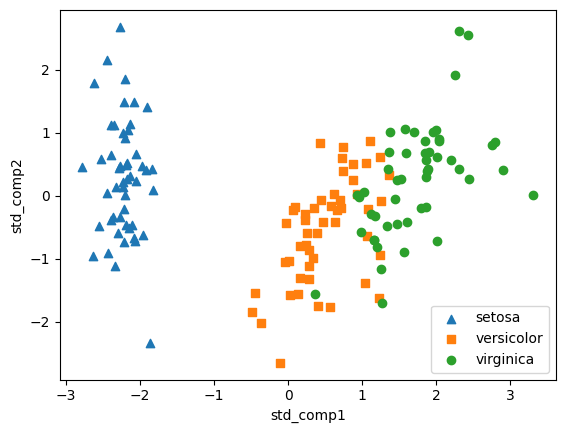

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaler로 평균 0, 분산 1인 상태로 4개의 차원을 표준화
std_scaler = StandardScaler() 
iris_std = std_scaler.fit_transform(irisDF.iloc[:, :-1]) 
iris_std

# PCA를 통해 4개의 차원을 가장 많이 설명할 수 있는 2개의 직교하는 축을 찾아 차원을 축소
pca = PCA(n_components=2)
iris_std_pca_result = pca.fit_transform(iris_std)  

print(pca.explained_variance_ratio_)

# 축소한 2개 차원이 실제로 원래 특성 2개와 비교했을 때 좀더 깔끔한 분류 경계를 보여주는지 확인
pca_iris_df = pd.DataFrame(iris_std_pca_result, columns=['std_comp1', 'std_comp2'])
pca_iris_df['label'] = irisDF['target']
print(pca_iris_df.head())

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
# 반복문을 수행해서 각 target별 matplotlib로 시각화
for i, marker in enumerate(markers):
    x_axis_data = pca_iris_df[pca_iris_df['label']==i]['std_comp1']
    y_axis_data = pca_iris_df[pca_iris_df['label']==i]['std_comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('std_comp1')
plt.ylabel('std_comp2')
plt.show()


In [40]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

# # 데이터 분리
# X_train,X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

lasso = linear_model.Lasso()

# # 학습(훈련시키기)
# lasso.fit(X_train, y_train)

# lasso.predict(X_test)
# lasso.score(X_test, y_test)

# 모델의 성능을 cv의 횟수만큼 교차검증(여러번 검증 )
print(cross_val_score(lasso, X, y, cv=3))


[0.3315057  0.08022103 0.03531816]


In [47]:
 pca_iris_df.iloc[:, :-1]

,std_comp1,std_comp2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [48]:
# RandomClassifier를 통해 전처리가 완료된 데이터를 분류 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=121)
scores = cross_val_score(rfc,  pca_iris_df.iloc[:, :-1],  pca_iris_df.iloc[:, -1], cv=3)
scores

array([0.88, 0.88, 0.9 ])

In [49]:
# 원본데이터 (4개 차원을 통해 RFC로 분류)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=121)
scores = cross_val_score(rfc, iris.data, iris.target, cv=3)
scores

array([0.98, 0.94, 0.98])

In [52]:
# 원본데이터 (4개 차원을 통해 RFC로 분류)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=121)
scores = cross_val_score(rfc, iris.data, iris.target, cv=3)
scores

array([0.98, 0.94, 0.98])

In [54]:
irisDF.iloc[:, 2:4]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [51]:
# 표준화를 거친 4개 원본 차원을 RFC로 분류
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=121)
scores = cross_val_score(rfc, iris_std, iris.target, cv=3)
scores


array([0.98, 0.94, 0.98])

In [55]:
# 표준화를 거치지 않은 원본의 petal_length	petal_width를 사용하여 RFC로 분류
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=121)
scores = cross_val_score(rfc, irisDF.iloc[:, 2:4], iris.target, cv=3)
scores


array([0.98, 0.94, 0.96])

In [ ]:
# pca는 차원을 축소해서 계산의 복잡도를 감소시키기 위한 차원축소방법일 뿐입니다.
# pca를 한다고 무조건 성능이 좋아지지는 않습니다 (손실되는 데이터에 대한 정보가 생기기 때문에)
# 하지만 속도는 빨라집니다 
# 차원이 엄청 복잡한 경우에는 pca를 해서 더 좋은 성능을 낼 수도 있습니다
# 블랙박스... 모델은 차원들 사이의 관계를 학습할 뿐 이게 왜 나왔을까??? 에 대해서는 가장 이해하기 어려운 알고리즘 
# 기왕이면 scaling을 pca전에 거쳐주시는 것이 좋다!!! 

# 이미지 데이터를 활용한 PCA 이해

- 데이터 정규화 - Whitening 이라고도 하며, 데이터분포를 원점 기준으로 변경
- Covariance matrix 의 eigen value 와 eigen vector 를 계산하고 내림차순으로 정렬
- 주성분의 수에 따라 가장 큰 n개의 eigen value를 추출하고 대응하는 eigen vector의 기저공간으로 데이터를 사영함

In [59]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [61]:
digits.data.shape

(1797, 64)

In [65]:
digits.images.shape

(1797, 8, 8)

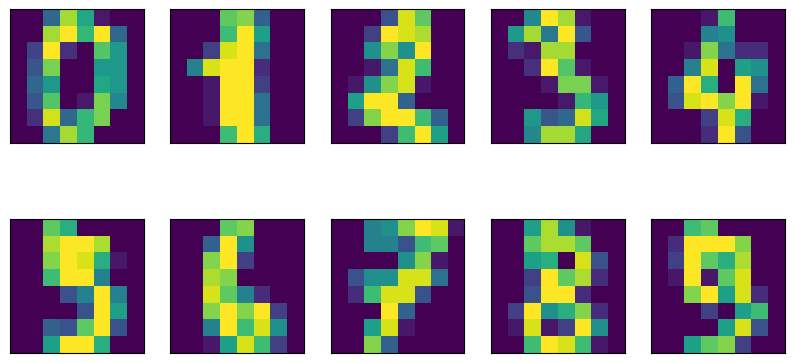

In [56]:
from sklearn.datasets import load_digits

rf_clf = RandomForestClassifier(random_state=121)

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [ ]:
len(digits.images)  # 1797 장

1797

In [ ]:
digits.images[0]  # 64차원 (8 x 8)
# 0은 어두움, 255에 가까울수록 밝음 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [67]:
# 64차원의 digits 데이터를 2차원으로 축소해보세요 
pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)
digits_pca

array([[ -1.25946471,  21.27488351],
       [  7.95761581, -20.76870196],
       [  6.99191741,  -9.95598351],
       ...,
       [ 10.80128411,  -6.96025188],
       [ -4.87210891,  12.42396337],
       [ -0.34439299,   6.36555155]])

In [68]:
print(f'components_ {pca.components_}')  # 64차원 고유행렬 
print(f'pca.explained_variance_ {pca.explained_variance_}') # 1번째축의 분산(가장 분산이 큰 1번째), 거기서 직교한 2번째축의 분산
print(f'explained_variance_ratio_ {pca.explained_variance_ratio_}') # 총 28% 정도의 데이터만 건짐 
print(f'n_component {pca.n_components_}') # 2개 축으로 만들었다
print(f'n_features_ {pca.n_features_}')  # 64개가 들어와서
print(f'n_features_ {pca.n_features_in_}')
print(f'n_samples_ {pca.n_samples_}') # 1797장으로 만들었다 

components_ [[ 8.14125463e-17 -1.73094728e-02 -2.23428875e-01 -1.35913295e-01
  -3.30322975e-02 -9.66340914e-02 -8.32945296e-03  2.26899742e-03
  -3.20516550e-04 -1.19308926e-01 -2.44451677e-01  1.48512745e-01
  -4.67319652e-02 -2.17740735e-01 -1.48136979e-02  4.47779128e-03
  -4.94136152e-05 -7.95419477e-02  8.33951648e-02  2.15915337e-01
  -1.72126777e-01 -1.63712106e-01  2.86444112e-02  4.23251559e-03
   9.85488818e-05  6.42319221e-02  2.54093312e-01 -3.56771161e-02
  -2.09462529e-01 -4.31311979e-02  5.13118285e-02  2.13422629e-04
   0.00000000e+00  1.59950893e-01  3.68690746e-01  1.64406778e-01
   8.52008064e-02  3.72982895e-02  2.15866973e-02  0.00000000e+00
   1.28865587e-03  1.06945303e-01  3.03067474e-01  2.47813025e-01
   2.09637289e-01  1.22325329e-02 -3.69458372e-02  1.61484996e-03
   6.93023500e-04 -8.35144303e-03 -5.58599014e-02  9.30534142e-02
   1.07387693e-01 -1.37734599e-01 -6.32879641e-02  9.61667392e-04
   9.55079862e-06 -1.40786912e-02 -2.35675528e-01 -1.41225566e-0

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pca.mean_ # 각 64개 차원의 차원별 평균 

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

In [75]:
del PCA

Text(0, 0.5, '2st PC')

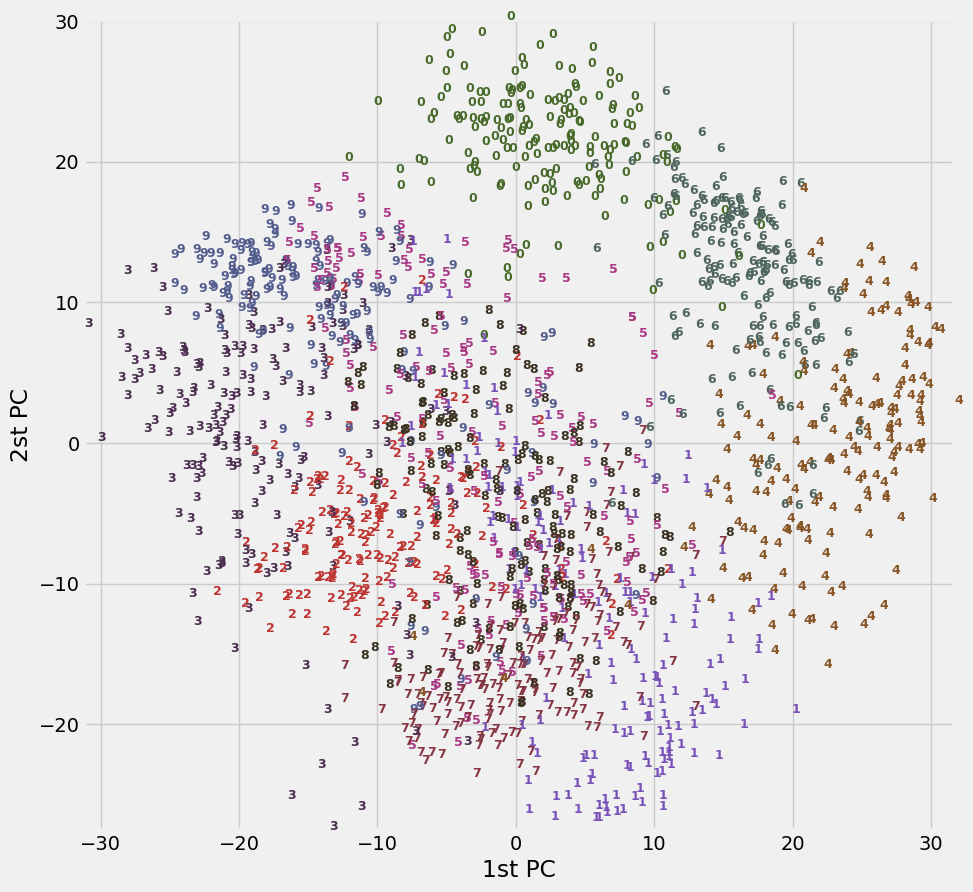

In [77]:
from sklearn.decomposition import PCA 
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st PC")
plt.ylabel("2st PC")

## 중간과정을 보고 싶다면

In [69]:
import numpy as np
import scipy
import scipy.stats
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from ipywidgets import interact

plt.style.use('fivethirtyeight')


MNIST = fetch_openml('mnist_784', version=1)
images = MNIST['data'].to_numpy().astype(np.double) / 255.


# 1. Normalization
def normalize(X):
    N, D = X.shape
    mu = np.mean(X, axis=0)
    Xbar = X - mu
    return Xbar, mu
    
    
# 2. Covariance matrix 의 eigenvalue, eigenvector 계산
def eig(S):
    eig_vals, eig_vecs = np.linalg.eig(S)
    sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
    return eig_vals[sort_indices], eig_vecs[:, sort_indices]    


# 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영
def reconstruct(X, PC):
    return (X @ PC) @ PC.T # vector projection 참고


# PCA 알고리즘
def PCA(images, num_components, num_data=1000):
    X = images[:num_data]
    N, D = X.shape

    # 1. Normalization
    X_normalized, mean = normalize(X)

    # 2. Covariance matrix 의 eigenvalue, eigenvector 계산
    S = (X_normalized.T @ X_normalized) / N
    eig_vals, eig_vecs = eig(S)

    # 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영
    principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components])

    reconst_X = reconstruct(X_normalized, principal_components) + mean
    return reconst_X, mean, principal_vals, principal_components

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


interactive(children=(IntSlider(value=15, description='NUM_PC', max=30, min=1), Output()), _dom_classes=('widg…

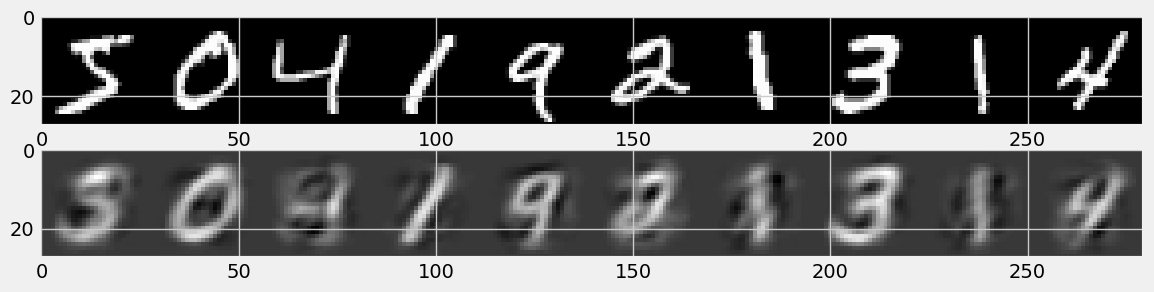

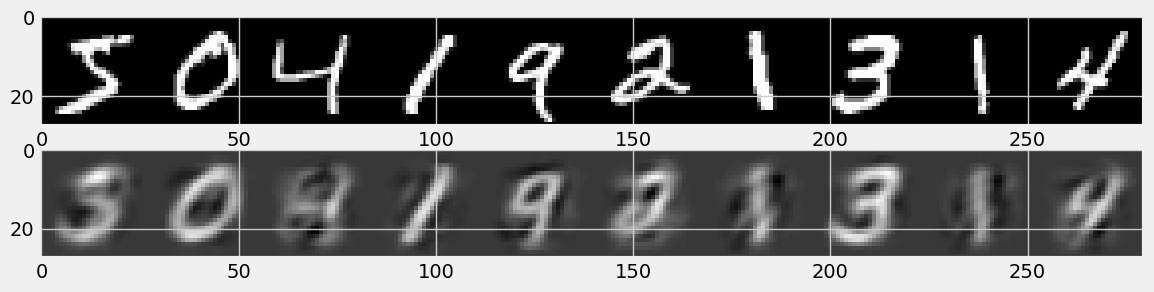

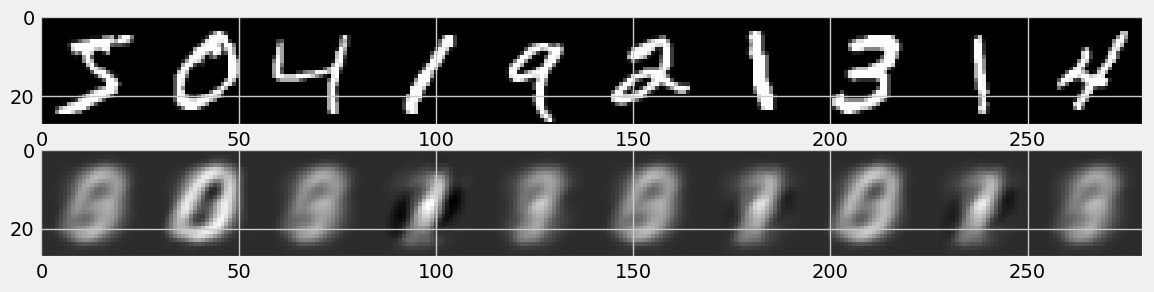

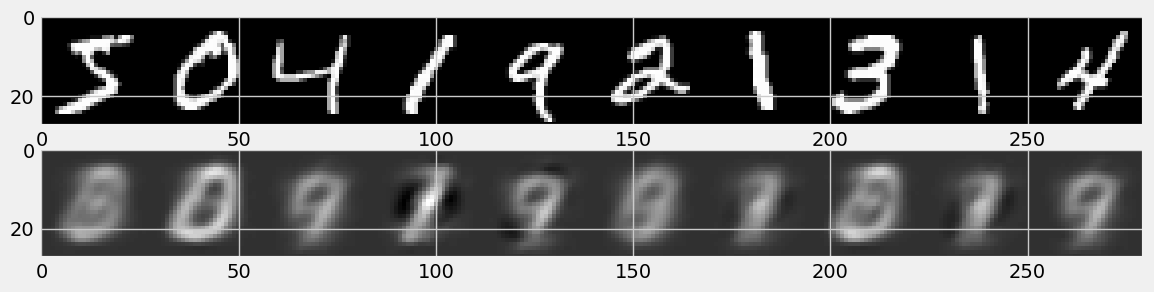

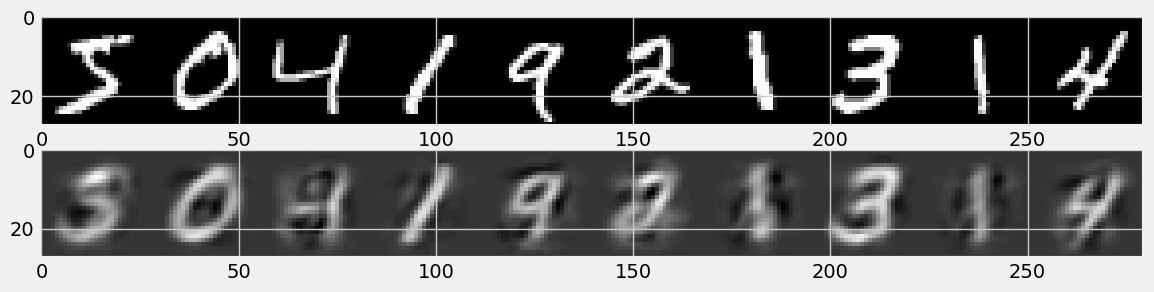

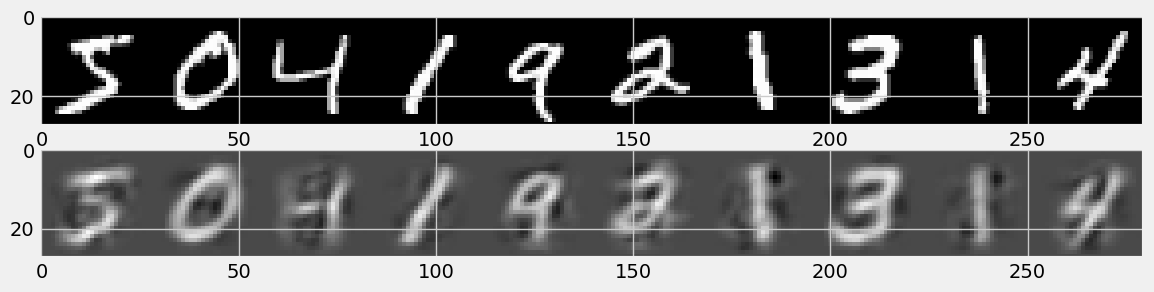

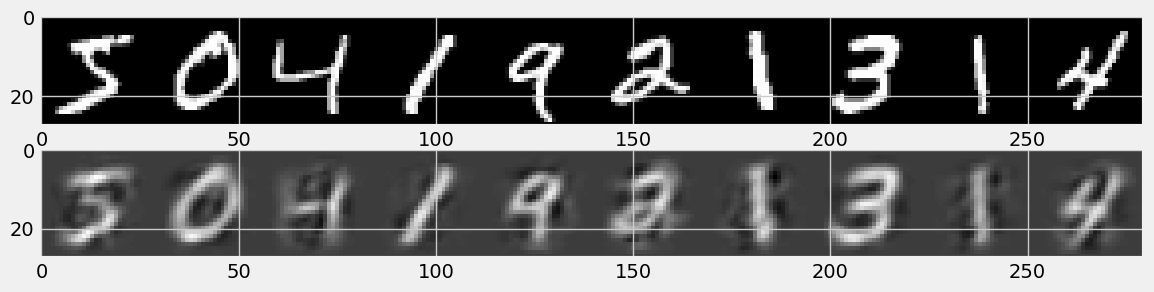

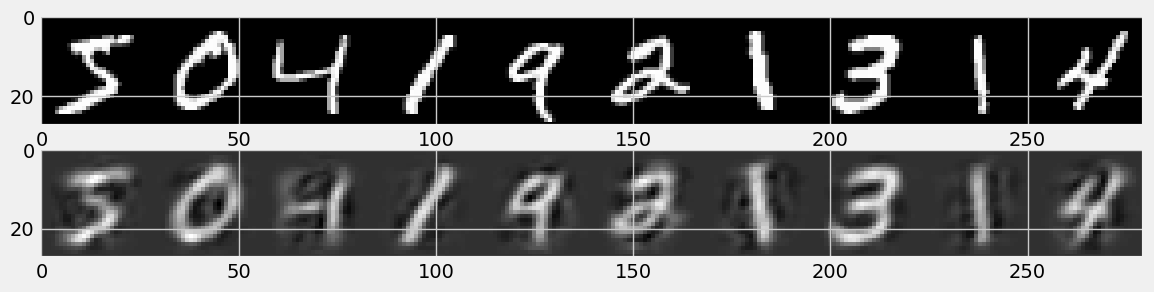

In [70]:
# PCA 데이터 압축 시각화

@interact(NUM_PC=(1, 30), continuous_update=False)
def plot_pca_images(NUM_PC=15):
    num_images_to_show = 10
    reconst_X, _, _, _ = PCA(images, NUM_PC)
    
    origin_image = np.reshape(images[:num_images_to_show], (-1, 28, 28))
    reconst_image = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28))
    fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
    
    ax[0].imshow(np.concatenate(origin_image, -1), cmap="gray")
    ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")

n = 1, reconstruction_error = 46.465431
n = 6, reconstruction_error = 31.284116
n = 11, reconstruction_error = 24.259506
n = 16, reconstruction_error = 19.831531
n = 21, reconstruction_error = 16.731753
n = 26, reconstruction_error = 14.364567
n = 31, reconstruction_error = 12.488758
n = 36, reconstruction_error = 11.002660
n = 41, reconstruction_error = 9.782333
n = 46, reconstruction_error = 8.774709
n = 51, reconstruction_error = 7.918999
n = 56, reconstruction_error = 7.187890
n = 61, reconstruction_error = 6.558557
n = 66, reconstruction_error = 6.020713
n = 71, reconstruction_error = 5.540953
n = 76, reconstruction_error = 5.120755
n = 81, reconstruction_error = 4.744785
n = 86, reconstruction_error = 4.418276
n = 91, reconstruction_error = 4.122307
n = 96, reconstruction_error = 3.853247


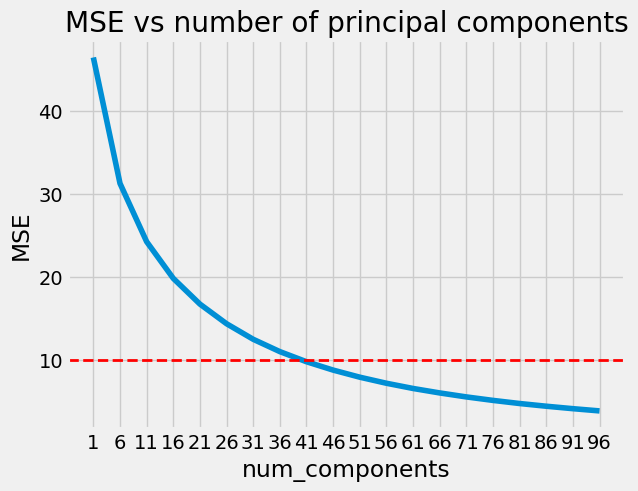

In [71]:
def mse(predict, actual):    
    return np.square(predict - actual).sum(axis=1).mean()
    
    
loss = []
reconstructions = []

for num_component in range(1, 100, 5):
    X = images[:1000]
    reconst, _, _, _ = PCA(X, num_component)
    error = mse(reconst, X)
    reconstructions.append(reconst)
    print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions
loss = np.asarray(loss)

# MSE 시각화
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

# 주성분 개수에 따른 원본데이터 대비 MSE 값을 계산하여 그래프를 그려보니 특정 임계치(MSE=10) 기준으로 41개 근방에서 기울기가 완만해짐
# 따라서 데이터압축 시 41개 이하의 주성분으로도 충분히 데이터복원이 가능. (참고로 원본이미지 데이터의 차원수는 28 * 28 = 784 이다.)

interactive(children=(IntSlider(value=500, description='image_idx', max=1000), Output()), _dom_classes=('widge…

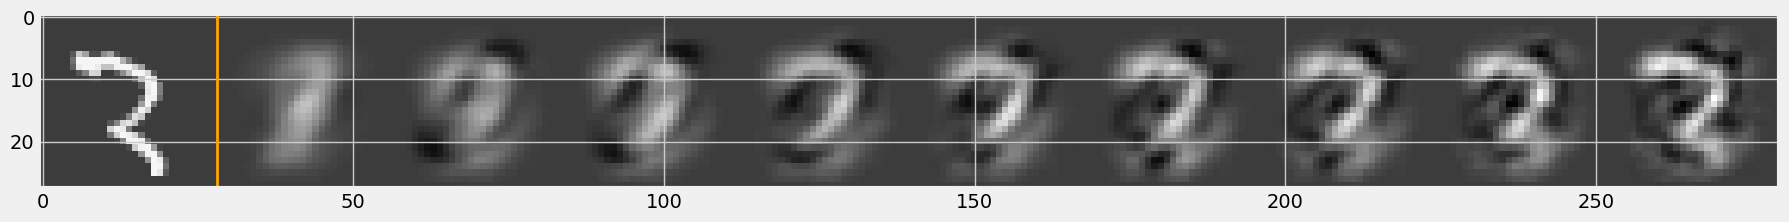

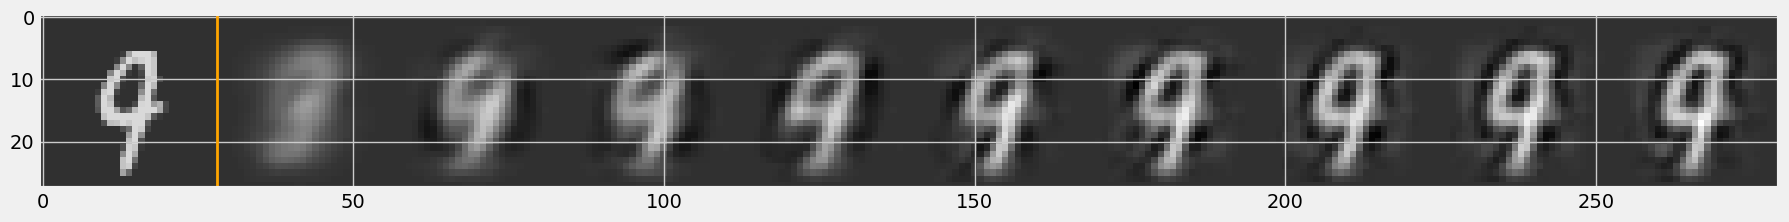

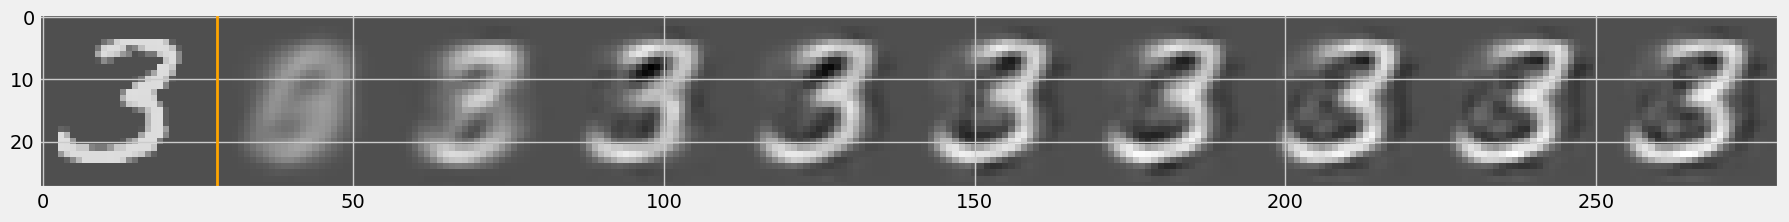

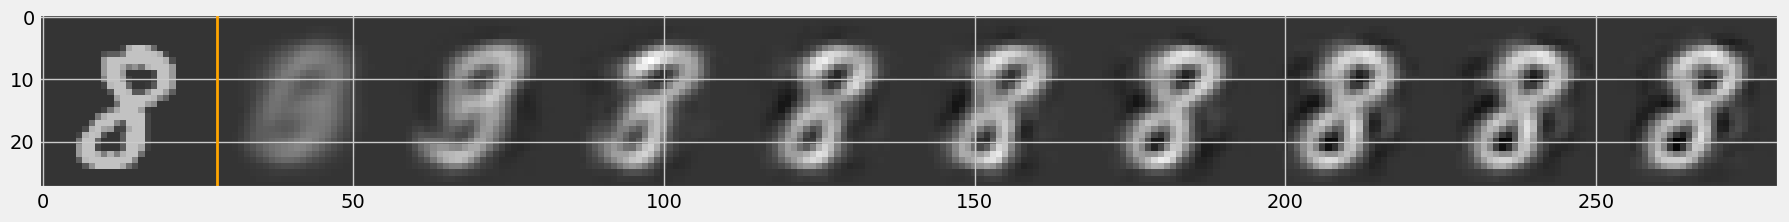

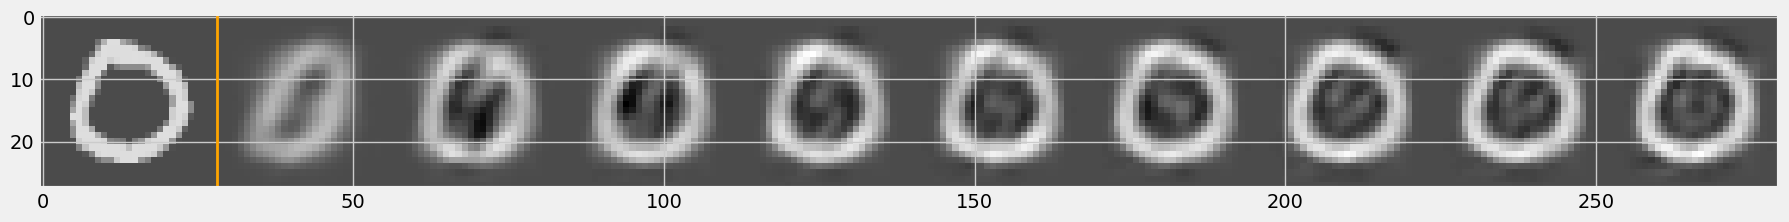

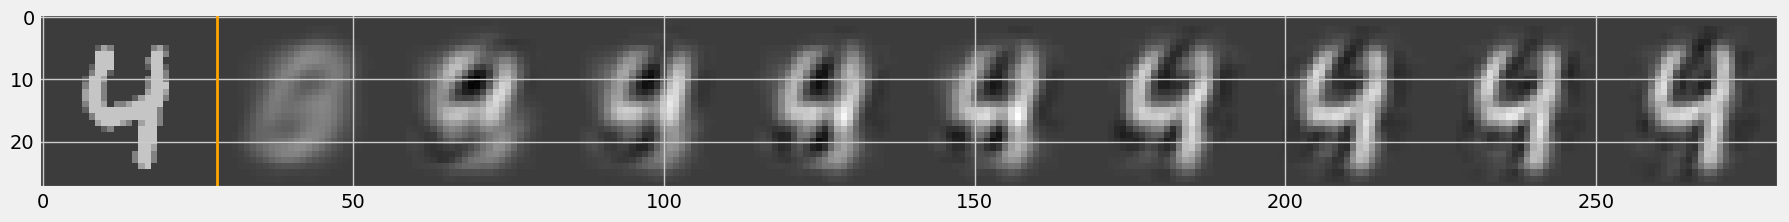

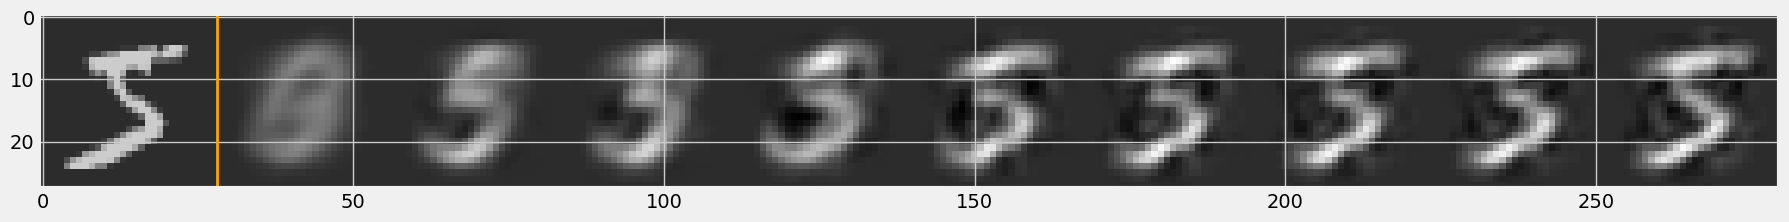

In [72]:
@interact(image_idx=(0, 1000))
def show_num_components_reconst(image_idx):
    fig, ax = plt.subplots(figsize=(20., 20.))
    actual = X[image_idx]
    x = np.concatenate([actual[np.newaxis, :], reconstructions[:, image_idx]])
    ax.imshow(np.hstack(x.reshape(-1, 28, 28)[np.arange(10)]), cmap='gray');
    ax.axvline(28, color='orange', linewidth=2)

https://www.youtube.com/watch?v=4UNlDjWV3ls

# 커널 PCA
## 매니폴드 학습(manifold learning) 
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F996B663A5B8A488F2FDA98)


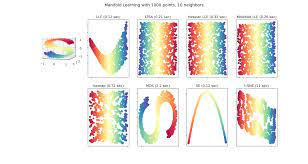
- 비선형 문제를 해결하기 위해 클래스를 새로운 선형으로 구분되는 새로운 고차원 특성 공간에 데이터를 투영하는 기법.
그 다음 고차원 공간에서 표준 PCA를 사용하여 샘플이 선형 분류기로 구분될 수 있는 저차원 공간에 데이터를 다시 투영합니다.

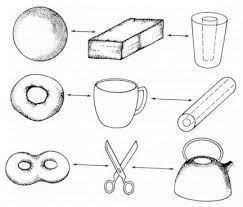
- 위상수학은 물체의 모양이 바뀌어도 바뀌지 않는 기하학적 성질을 연구하는 분야입니다. 그래서 구멍을 뚫거나 찢지만 않으면 아무리 모양을 바꿔도 수학적으로 같다고 정의합니다. 쉽게 드는 예로 위상수학에서는 베이글 같은 도넛 모양 물체와 손잡이 달린 머그잔이 똑같다고 생각합니다.
- 출처: https://www.dongascience.com/news.php?idx=31079


- 커널 기법은 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간을 이용하는 방법입니다.

# t-SNE
- 커널 PCA 기법을 활용한 대표적 트릭

- 시각화 알고리즘으로 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공합니다. (t-SNE 알고리즘을 많이 사용)
-  시각화를 목적으로 하기에 주로 2개 정도의 특성을 뽑습니다. 일부 매니폴드 알고리즘은 훈련 데이터는 새로운 표현으로 변환시키지만 새로운 데이터에는 적용할 수 없음.

- t-SNE는 t-Distributed Stochastic Neighbor Embedding의 약자

Text(0.5, 0, 't-SNE feature 1')

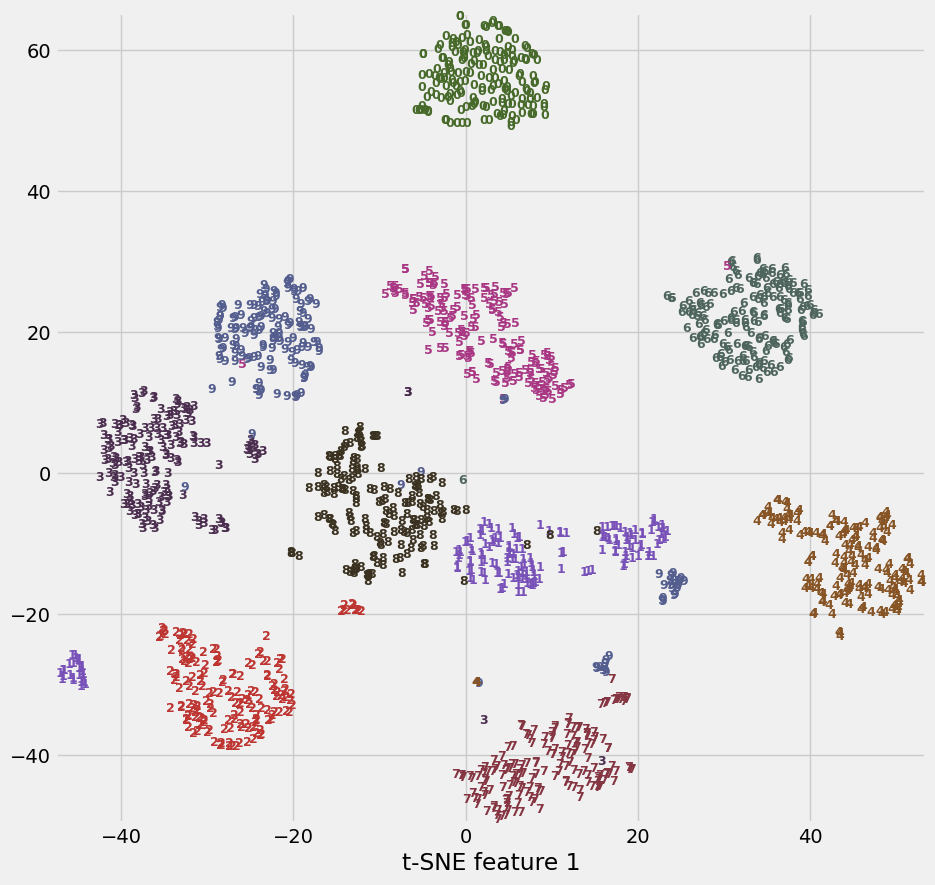

In [78]:
# 64차원 -> 2차원으로 줄이는 것은 PCA와 같습니다 
from sklearn.manifold import TSNE #  Stochastic - 확률(론)적인 Embedding - 파견하다

tsne = TSNE(random_state=121)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

In [79]:
dir(tsne)

['_EXPLORATION_N_ITER',
 '_N_ITER_CHECK',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_check_params_vs_input',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tsne',
 '_validate_data',
 '_validate_params',
 'angle',
 'early_exaggeration',
 'embedding_',
 'fit',
 'fit_transform',
 'get_params',
 'init',
 'kl_divergence_',
 'learning_rate',
 'learning_rate_',
 'method',
 'metric',
 'metric_params',
 'min_grad_norm',
 'n_components',
 'n_features_in_',
 'n_iter',
 'n_it

In [80]:
tsne.embedding_

array([[ -3.3609557,  55.398895 ],
       [ 10.580261 , -11.921168 ],
       [-13.693287 , -19.156544 ],
       ...,
       [ -5.691157 , -11.151473 ],
       [-20.40624  ,  15.00406  ],
       [-13.865294 ,  -7.322332 ]], dtype=float32)

In [81]:
tsne.kl_divergence_ # 기존 확률분포와 새 데이터가 들어온 상태의 예상확률분포가 어떻게 다른지 차이 

0.7540405988693237

In [82]:
tsne.perplexity # 당혹감 확률분포를 새로 계산을 합니다  

30.0